<h2>Домашнее задание №1 по курсу "Проектирование интеллектуальных систем"</h2>

<p><b>Выполнил:</b> Саврасов П.А. группа ИУ5-24М</p>

<h3>Задание</h3>
<p>Для выполнения домашнего задания требуется обучить нейронную сеть на собственном датасете, созданном в домашнем задании №1</p>

In [15]:
import re
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.datasets import fetch_20newsgroups

В даненом домашнем задании сравним несколько моделей (MLP, RNN) в задаче классификации текста, так же сравним несколько векторизаторов текста.<br>
Для начала загрузим датасет из домашнегно задания 1

In [6]:
with open('messages.json', 'r') as file: 
    data = json.loads(file.read())

data = pd.json_normalize(data['messages'])

Для векторизации текстов применим 2 векторизатора: TfidfVectorizer, CountVectorizer

In [41]:
xData = []
inputDims = []


vectorizer = TfidfVectorizer()
xData.append(vectorizer.fit_transform(data['content']).toarray())
inputDims.append(len(vectorizer.get_feature_names()))

vectorizer = CountVectorizer()
xData.append(vectorizer.fit_transform(data['content']).toarray())
inputDims.append(len(vectorizer.get_feature_names()))


In [46]:
models = []
for inpudDim in inputDims:
    
    model = tf.keras.Sequential(
        [
            layers.InputLayer(input_shape=(inputDim)),
            layers.Dense(300, activation='relu'),
            layers.Dense(200, activation='relu'),
            layers.Dense(100, activation='relu'),
            layers.Dense(2, activation='relu')
        ]
    )
    models.append(model)
    
    

In [47]:
for model in models:
    model.compile (
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=keras.optimizers.Adam(),
        metrics=['accuracy']
    )


In [48]:
xTrain = []
xTest = []
yTrain = []
yTest = []


for x in xData:
    x_train, x_test, y_train, y_test = train_test_split(x, data['target'], test_size=0.3, random_state=42)
    xTrain.append(x_train)
    xTest.append(x_test)
    yTrain.append(y_train)
    yTest.append(y_test)

historys = [] 
    
for i in range(2):
    historys.append(models[i].fit(xTrain[i], yTrain[i],epochs=10, verbose=2))
    models[i].evaluate(xTest[i], yTest[i], verbose=2)
        

Epoch 1/10
276/276 - 2s - loss: 0.3222 - accuracy: 0.8916
Epoch 2/10
276/276 - 1s - loss: 0.2305 - accuracy: 0.8924
Epoch 3/10
276/276 - 1s - loss: 0.1901 - accuracy: 0.8924
Epoch 4/10
276/276 - 1s - loss: 0.1746 - accuracy: 0.8924
Epoch 5/10
276/276 - 1s - loss: 0.1631 - accuracy: 0.8923
Epoch 6/10
276/276 - 1s - loss: 0.1598 - accuracy: 0.8924
Epoch 7/10
276/276 - 1s - loss: 0.1569 - accuracy: 0.8924
Epoch 8/10
276/276 - 1s - loss: 0.1568 - accuracy: 0.8924
Epoch 9/10
276/276 - 1s - loss: 0.1538 - accuracy: 0.8924
Epoch 10/10
276/276 - 1s - loss: 0.1518 - accuracy: 0.8924
119/119 - 0s - loss: 0.3606 - accuracy: 0.9018
Epoch 1/10
276/276 - 2s - loss: 0.1745 - accuracy: 0.9589
Epoch 2/10
276/276 - 2s - loss: 0.0821 - accuracy: 0.9766
Epoch 3/10
276/276 - 2s - loss: 0.0605 - accuracy: 0.9779
Epoch 4/10
276/276 - 2s - loss: 0.0459 - accuracy: 0.9782
Epoch 5/10
276/276 - 2s - loss: 0.0422 - accuracy: 0.9798
Epoch 6/10
276/276 - 2s - loss: 0.0378 - accuracy: 0.9799
Epoch 7/10
276/276 - 2s 

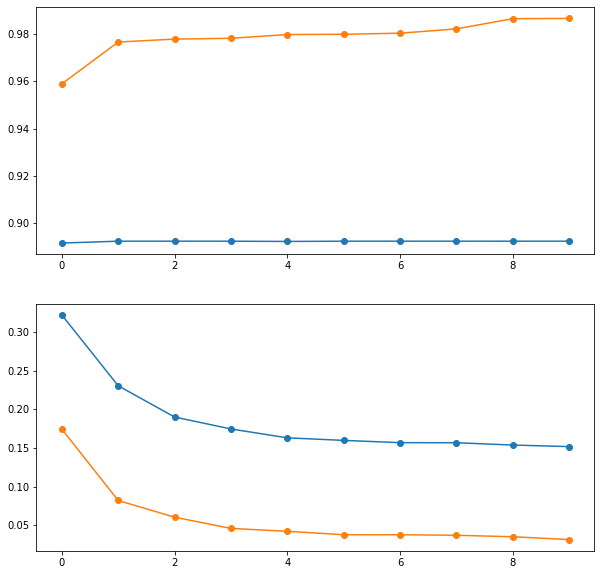

In [63]:
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(historys[0].epoch, historys[0].history['accuracy'], '-o')
plt.plot(historys[1].epoch, historys[1].history['accuracy'], '-o')

plt.subplot(2, 1, 2)
plt.plot(historys[0].epoch, historys[0].history['loss'], '-o')
plt.plot(historys[1].epoch, historys[1].history['loss'], '-o')

plt.show()